# Import Necessary Libraries

In [1]:
import pandas as pd
import os

## Merging the 12 months data

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [3]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


### Updated DataFrame with all months included in one csv file

In [4]:
all_data = pd.read_csv('all_data.csv', index_col=0)
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 222910 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
dtypes: object(5)
memory usage: 8.6+ MB


# Cleaning the data

In [6]:
# Checking for Nan in dataset
nan_df = all_data[all_data.isna()]
nan_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
222910,NaN,NaN,NaN,NaN,NaN
222911,NaN,NaN,NaN,NaN,NaN
222912,NaN,NaN,NaN,NaN,NaN
222913,NaN,NaN,NaN,NaN,NaN
222914,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
259353,NaN,NaN,NaN,NaN,NaN
259354,NaN,NaN,NaN,NaN,NaN
259355,NaN,NaN,NaN,NaN,NaN


In [53]:
# Removing the Nan values in all elements
all_data = all_data.dropna(how='all')
all_data.isna()      # confirm all Nan's are removed

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,False,False,False,False,False,False,False
222911,False,False,False,False,False,False,False
222912,False,False,False,False,False,False,False
222913,False,False,False,False,False,False,False
222914,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
259353,False,False,False,False,False,False,False
259354,False,False,False,False,False,False,False
259355,False,False,False,False,False,False,False


In [54]:
print(all_data['Month'].unique())

[7 8 4 5 10 11 6 1 2 3 12 9]


In [55]:
# Find and delete "Or"
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Converting columns to correct type

In [56]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Checking the best month for sales and how much was earned

 ### 1. Creating months columns

In [57]:
# Extracting the month
all_data.loc[:, 'Month'] = all_data['Order Date'].str[0:2]

# Converting the Month column to int32
all_data.loc[:, 'Month'] = all_data['Month'].astype('int32')

# Display the first few rows
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


### 2. Creating sales column

In [58]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


### 3. Checking the best month for sales

In [59]:
results = all_data.groupby('Month')[['Quantity Ordered', 'Price Each', 'Sales']].sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### 4. Visualize the monthly sales

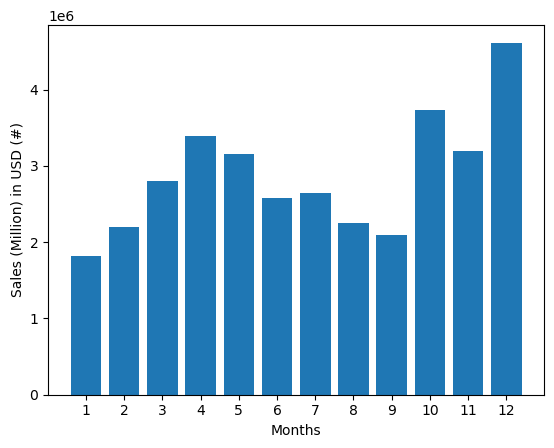

In [63]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales (Million) in USD (#)')
plt.show()


# Results 
## Insights from the data

This shows that Decemeber is the best month in terms of sales with the highest sales of USD 4613443.34

# Checking City with the highest number of sales

### 1. Creating City Column

In [82]:
# Extracting the City by splitting 'Purchase Address' by commas
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip()) # Used lambda function to extact second element - City
all_data.head() # confirm column created

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta
222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle
222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta
222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta
222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle


In [83]:
# Group by City and sum of the Sales
city_sales = all_data.groupby('City')['Sales'].sum()
city_sales

City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64

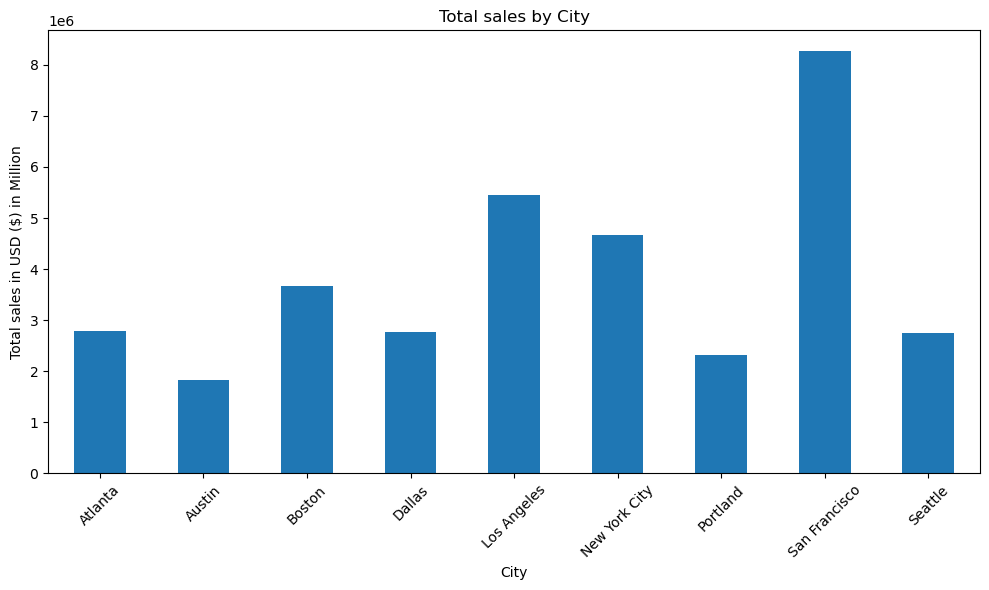

In [81]:
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Total sales in USD ($) in Million')
plt.title('Total sales by City')
plt.tight_layout()
plt.show()